In [ ]:
%%capture
! pip install underthesea==6.6.0  pyvi

In [ ]:
import pandas as pd
import re
import string
import numpy as np
from underthesea import word_tokenize
from pyvi import ViTokenizer
from bs4 import BeautifulSoup

# Tìm hiểu dữ liệu

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/data_final.xlsx")
print(df.shape)
df.head(10)

(26911, 4)


,Unnamed: 0,old_data,new_data,label
0,0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",cửa hàng giao sản phẩm đã qua sử dụng không hà...,0
1,1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",đóng gói cẩn thận sản phẩm mới và nhỏ gọn rất ...,4
2,2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",sản phẩm nhỏ gọn giao hàng rất nhanh,1
3,3,sản phẩm rất chuẩn so vs quảng cáo.,sản phẩm rất chuẩn so vs quảng cáo,1
4,4,Nhỏ gọn gê,nhỏ gọn ghê,1
5,5,"ổ cứng chạy rất nhanh, nhỏ hơn mình nghĩ nhưng...",ổ cứng chạy rất nhanh nhỏ hơn mình nghĩ nhưng ...,1
6,6,Sản phẩm chất lượng chính hãng. Rất hài lòng. ...,sản phẩm chất lượng chính hãng rất hài lòng nh...,1
7,7,"Hàng giao nhanh, xai rất ổn định. Mình xài cũn...",hàng giao nhanh xai rất ổn định mình xài cũng ...,4
8,8,"Ổ cứng nhỏ gọn và tốc độ truyền dữ liệu nhanh,...",ổ cứng nhỏ gọn và tốc độ truyền dữ liệu nhanh ...,1
9,9,"Tốc độ nhanh, nhỏ gọn hơn nhiều so với mình tư...",tốc độ nhanh nhỏ gọn hơn nhiều so với mình tưở...,1


In [ ]:
df_label = df['label'].value_counts()
df_label

label
1    14436
2     4140
0     4070
4     2462
3      931
5      382
Name: count, dtype: int64

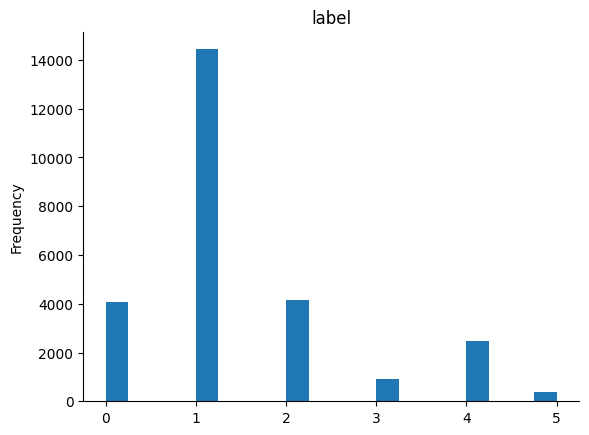

In [ ]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Xử lý dữ liệu

In [ ]:
df = df.drop(['new_data', 'Unnamed: 0'], axis=1)
df.head()

,old_data,label
0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",0
1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",4
2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",1
3,sản phẩm rất chuẩn so vs quảng cáo.,1
4,Nhỏ gọn gê,1


In [ ]:
# Xóa các dòng có cột "old_data" là null hoặc rỗng
df = df.dropna(subset=['old_data'])
# Xóa khoảng trắng đầu và cuối
df.loc[:, 'old_data'] = df['old_data'].str.strip()
# Xóa các dòng chỉ có một từ và một kí tự trong cột "old_data"
df = df[df['old_data'].str.contains(r'\s+')]
print(df.shape)
df

(26421, 2)


,old_data,label
0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",0
1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",4
2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",1
3,sản phẩm rất chuẩn so vs quảng cáo.,1
4,Nhỏ gọn gê,1
...,...,...
26906,"Sp vô cùng tốt,dùng 2 ngày rưỡi mới hết pin, m...",1
26907,"Máy tốt ,mọi sử dụng không có vân đề gì,nghe n...",1
26908,Chất quá các bro ơi :D Mình thì mua về để đấy ...,1
26909,Sản phẩm quá tệ. Pin dùng chưa được 2 ngày đã ...,0


In [ ]:
def xoaDongTrong(text):
    # Tách văn bản thành các dòng
  lines = text.split("\n")
  # Lọc bỏ các dòng trống
  non_empty_lines = [line.strip() for line in lines if line.strip()]
  # Ghép các dòng lại thành văn bản mới
  return "\n".join(non_empty_lines)

 # Xóa các dòng trống trong cột "content"
df.loc[:, 'old_data'] = df['old_data'].apply(xoaDongTrong)
df

,old_data,label
0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",0
1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",4
2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",1
3,sản phẩm rất chuẩn so vs quảng cáo.,1
4,Nhỏ gọn gê,1
...,...,...
26906,"Sp vô cùng tốt,dùng 2 ngày rưỡi mới hết pin, m...",1
26907,"Máy tốt ,mọi sử dụng không có vân đề gì,nghe n...",1
26908,Chất quá các bro ơi :D Mình thì mua về để đấy ...,1
26909,Sản phẩm quá tệ. Pin dùng chưa được 2 ngày đã ...,0


In [ ]:
teencode_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/teencode.csv')
teencode_dict = dict(zip(teencode_df['Key'], teencode_df['Value']))
teencode_dict

{'ctrai': 'con trai',
 'khôg': 'không',
 'bme': 'bố mẹ',
 'cta': 'chúng ta',
 'mih': 'mình',
 'mqh': 'mối quan hệ',
 'cgai': 'con gái',
 'nhữg': 'những',
 'mng': 'mọi người',
 'svtn': 'sinh viên tình nguyện',
 'r': 'rồi',
 'qtam': 'quan tâm',
 'thươg': 'thương',
 'qtâm': 'quan tâm',
 'chug': 'chung',
 'trườg': 'trường',
 'thoy': 'thôi',
 'đki': 'đăng ký',
 'atsm': 'ảo tưởng sức mạnh',
 'ạk': 'ạ',
 'cv': 'công việc',
 'vch': 'vãi chưởng',
 'cùg': 'cùng',
 'pn': 'bạn',
 'pjt': 'biết',
 'thjk': 'thích',
 'keke': 'he he',
 'ktra': 'kiểm tra',
 'nek': 'nè',
 'cgái': 'con gái',
 'nthe': 'như thế',
 'chúg': 'chúng',
 'kái': 'cái',
 'tìh': 'tình',
 'phòg': 'phòng',
 'lòg': 'lòng',
 'từg': 'từng',
 'rằg': 'rằng',
 'sốg': 'sống',
 'thuj': 'thôi',
 'thuơng': 'thương',
 'càg': 'càng',
 'đky': 'đăng ký',
 'bằg': 'bằng',
 'sviên': 'sinh viên',
 'ák': 'á',
 'đág': 'đáng',
 'nvay': 'như vậy',
 'nhjeu': 'nhiều',
 'xg': 'xuống',
 'zồi': 'rồi',
 'trag': 'trang',
 'zữ': 'dữ',
 'atrai': 'anh trai',
 'kte':

In [ ]:
def rutGonTu(text):
    words = ViTokenizer.tokenize(text).split()
    pattern = r"(\w)\1{2,}"
    replacement = r"\1"
    for i in range(len(words)):
        matches = re.findall(pattern, words[i])
        if matches:
            rut_gon = re.sub(pattern, replacement, words[i])
            words[i] = rut_gon
    return ' '.join(words).replace("_"," ")

def TeencodeConversion(text, teencode_dict):
    words = text.split(" ")
    for i in range(len(words)):
        word = words[i].replace("_", " ").lower()
        if word in teencode_dict:
            words[i] = teencode_dict[word]
    return ' '.join(words)

In [ ]:
text = "shopppp lm ăn jjjjj kì"
convert_text= rutGonTu(TeencodeConversion(text, teencode_dict))

print(convert_text)

shop làm ăn j kì


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_Punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    text_new = text.translate(translator)
    text_new = re.sub(r'[^\w\s]', '', text_new)
    text_new = re.sub(r'\s+', ' ', text_new)
    return text_new

def Clean(text):
    #loại bỏ liên kết
    pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    filtered_text = re.sub(pattern, "", text)
  # loại bỏ htnml
    soup = BeautifulSoup(text, 'html.parser')
    filtered_text = soup.get_text(filtered_text)
    # xóa dấu câu
    filtered_text = remove_Punctuation(filtered_text)
    return filtered_text


def tach_tu(text):
	text = ViTokenizer.tokenize(text)
	return text

In [ ]:
df['data_clean'] = df['old_data'].apply(remove_emoji)
df['data_clean'] = df['data_clean'].apply(Clean)
df['data_clean'] = df['data_clean'].apply(lambda x: TeencodeConversion(x, teencode_dict))
df['data_clean'] = df['data_clean'].apply(rutGonTu) # Rút gọn các từ kéo dài
df['data_clean'] = df['data_clean'].apply(lambda x: x.lower())
df['data_clean'] = df['data_clean'].apply(tach_tu)
df.head(10)

<ipython-input-40-603a548738f0>:36: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,old_data,label,data_clean
0,"Shop giao sản phẩm đã qua sử dụng , không hài ...",0,shop giao sản_phẩm đã qua sử_dụng không hài_lò...
1,"Đóng gói cẩn thận, sp mới và nhỏ gọn. Rất hài ...",4,đóng_gói cẩn_thận sp mới và nhỏ gọn rất hài_lò...
2,"Sản phẩm nhỏ gọn, giao hàng rất nhanh.",1,sản_phẩm nhỏ gọn giao hàng rất nhanh
3,sản phẩm rất chuẩn so vs quảng cáo.,1,sản_phẩm rất chuẩn so với quảng_cáo
4,Nhỏ gọn gê,1,nhỏ gọn gê
5,"ổ cứng chạy rất nhanh, nhỏ hơn mình nghĩ nhưng...",1,ổ_cứng chạy rất nhanh nhỏ hơn mình nghĩ nhưng ...
6,Sản phẩm chất lượng chính hãng. Rất hài lòng. ...,1,sản_phẩm_chất_lượng chính hãng rất hài_lòng nh...
7,"Hàng giao nhanh, xai rất ổn định. Mình xài cũn...",4,hàng giao nhanh xai rất ổn_định mình xài cũng ...
8,"Ổ cứng nhỏ gọn và tốc độ truyền dữ liệu nhanh,...",1,ổ_cứng nhỏ gọn và tốc_độ truyền dữ_liệu nhanh ...
9,"Tốc độ nhanh, nhỏ gọn hơn nhiều so với mình tư...",1,tốc_độ nhanh nhỏ gọn hơn nhiều so với mình tưở...


In [ ]:
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Data/result_data.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8')